首先加载乳腺癌数据集，提取特征数据 X 和目标标签 y，并打印出数据集的形状以及正负样本的数量信息。
接着将数据集按照 80:20 的比例划分为训练集和测试集。

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import time    #导入库

In [34]:
# 载入数据，乳腺癌数据集（Breast Cancer dataset），这是一个常用的二分类数据集，用于预测患者的肿瘤是否为恶性
cancer = load_breast_cancer()
X = cancer.data  # 提取特征数据并存储在变量X中
y = cancer.target  # 提取目标标签（肿瘤是否为恶性）并存储在变量y中
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y == 1].shape[0], y[y == 0].shape[0]))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


data shape: (569, 30); no. positive: 357; no. negative: 212


In [36]:
针对线性核、多项式核和 RBF 核函数，分别定义了对应的函数来绘制学习曲线。
在每个函数内部，先创建相应的 SVC 模型。
然后使用 learning_curve 函数获取不同训练集大小下的训练得分和验证得分等信息。
进一步计算训练得分和验证得分的均值和标准差，以便更准确地展示得分的分布情况。
最后画图

SyntaxError: invalid character '、' (U+3001) (437333764.py, line 1)

In [38]:
# 线性核函数相关操作及绘制学习曲线
def linear_kernel_learning_curve():
    plt.figure(figsize=(10, 4), dpi=144)
    title = 'Learning Curves for Linear Kernel'

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    start = time.perf_counter()

    # 创建线性核函数的SVC模型
    clf = SVC(C=1.0, kernel='linear')

    # 使用learning_curve函数获取训练集大小、训练得分和验证得分
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, cv=cv, n_jobs=-1)

    # 计算训练得分和验证得分的均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='best')

    print('elaspe: {0:.6f}'.format(time.perf_counter() - start))

In [40]:

# 多项式核函数相关操作及绘制学习曲线
def polynomial_kernel_learning_curve():
    plt.figure(figsize=(12, 4), dpi=144)
    degrees = [1, 2]
    title = 'Learning Curves for Polynomial Kernel'

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    start = time.perf_counter()

    for i in range(len(degrees)):
        plt.subplot(1, len(degrees), i + 1)

        # 创建多项式核函数的SVC模型，设置不同的次数
        clf = SVC(C=1.0, kernel='poly', degree=degrees[i])

        # 使用learning_curve函数获取训练集大小、训练得分和验证得分
        train_sizes, train_scores, test_scores = learning_curve(
            clf, X, y, cv=cv, n_jobs=-1)

        # 计算训练得分和验证得分的均值和标准差
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color='r')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color='g')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
                 label='Training score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
                 label='Cross-validation score')
        plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.title(title.format(degrees[i]))
    plt.legend(loc='best')

    print('elaspe: {0:.6f}'.format(time.perf_counter() - start))

# RBF核函数相关操作及绘制学习曲线
def rbf_kernel_learning_curve():
    plt.figure(figsize=(10, 4), dpi=144)
    title = 'Learning Curves for Gaussian Kernel'

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    start = time.perf_counter()




In [42]:
# RBF核函数相关操作及绘制学习曲线
def rbf_kernel_learning_curve():
    plt.figure(figsize=(10, 4), dpi=144)
    title = 'Learning Curves for Gaussian Kernel'

    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    start = time.perf_counter()

    # 创建RBF核函数的SVC模型
    clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

    # 使用learning_curve函数获取训练集大小、训练得分和验证得分
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, cv=cv, n_jobs=-1)

    # 计算训练得分和验证得分的均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='best')

    print('elaspe: {0:.6f}'.format(time.perf_counter() - start))

elaspe: 1.298055
elaspe: 0.068946
elaspe: 0.130818


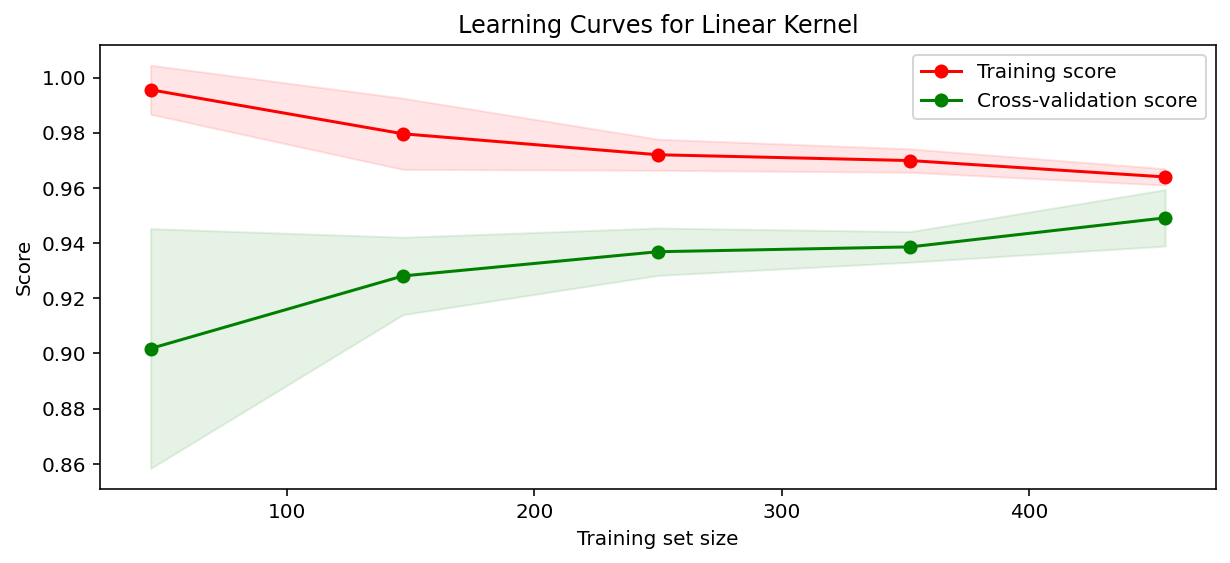

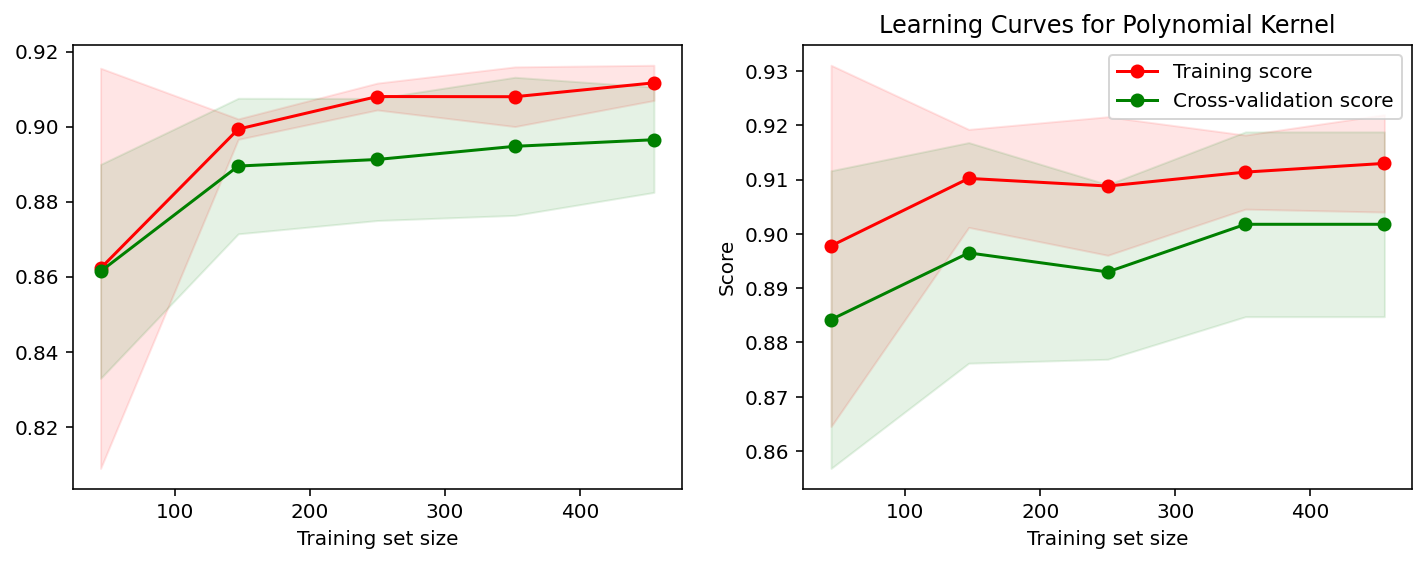

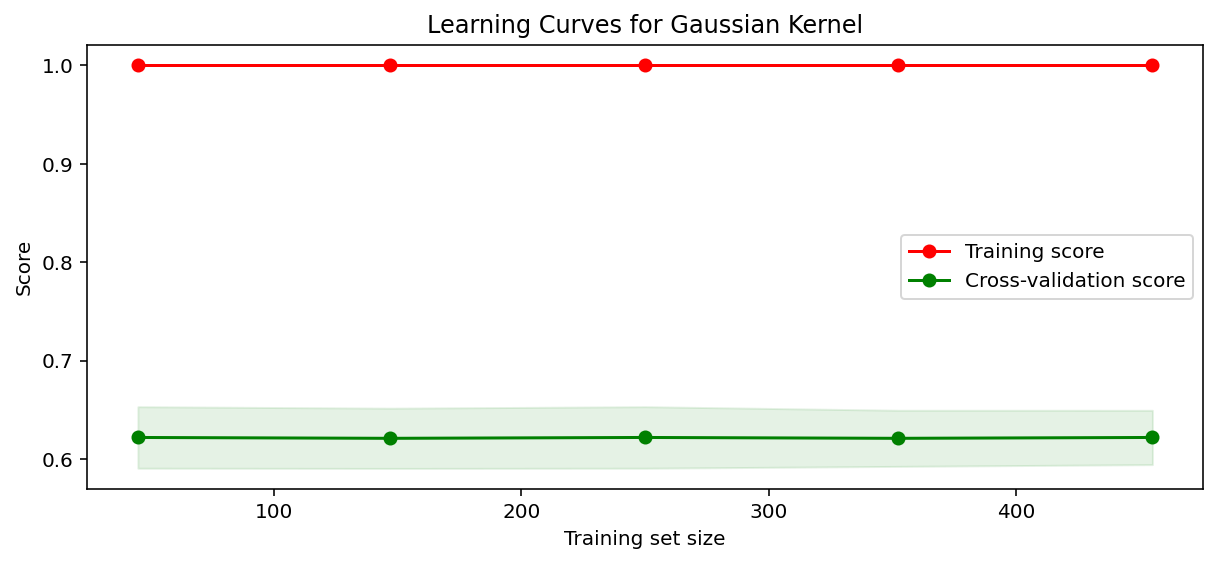

In [44]:
# 分别调用三个函数绘制三种核函数的学习曲线
linear_kernel_learning_curve()
polynomial_kernel_learning_curve()
rbf_kernel_learning_curve()

plt.show()